In [1]:
import pickle
data_path = "Beautiful woman in skin tight body suite working out in the gymq.pkl"
with open(data_path, "rb") as f:
    data = pickle.load(f)
# data["latents"], (N, 65535), tensor
# data["rewards"], (N,), tensor

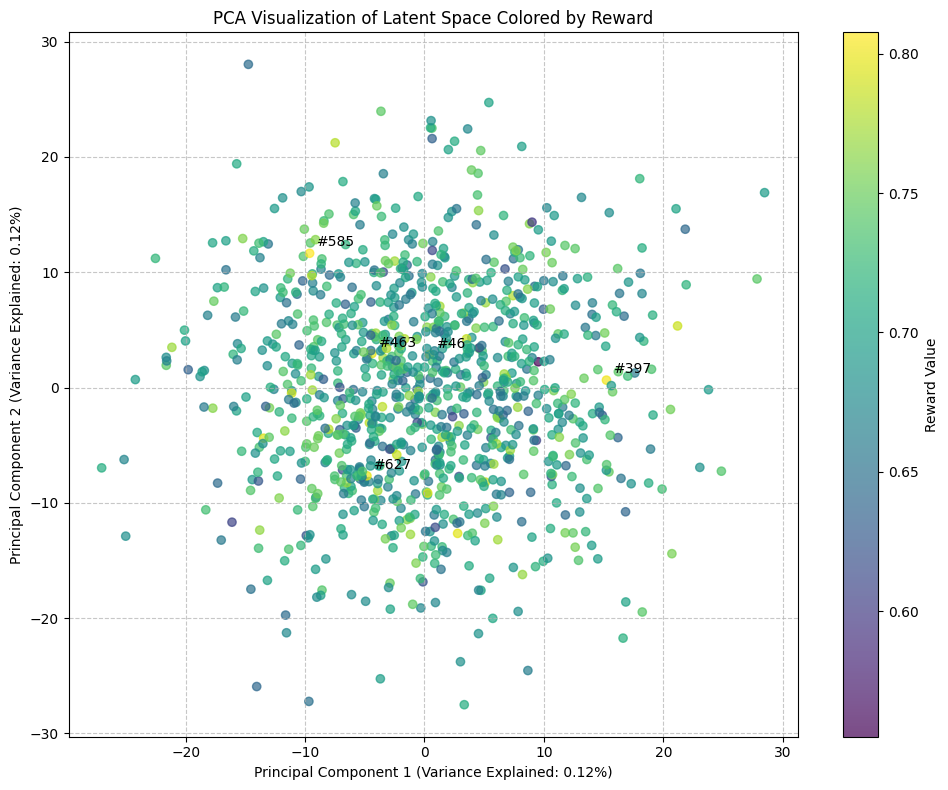

PCA explained variance ratios: [0.00115366 0.00115011]
Cumulative explained variance (first 2 components): 0.23%


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import torch

# Assuming data["latents"] is a tensor of shape (N, 65535)
# and data["rewards"] is a tensor of shape (N,)

# Convert data to numpy arrays (if they are PyTorch tensors)
if isinstance(data["latents"], torch.Tensor):
    latents = data["latents"].cpu().numpy()
else:
    latents = data["latents"]
    
if isinstance(data["rewards"], torch.Tensor):
    rewards = data["rewards"].cpu().numpy()
else:
    rewards = data["rewards"]

# Use PCA to reduce high-dimensional latents to 2D
pca = PCA(n_components=2)
latents_2d = pca.fit_transform(latents)

# Create scatter plot, colored by reward values
plt.figure(figsize=(10, 8))
scatter = plt.scatter(latents_2d[:, 0], latents_2d[:, 1], c=rewards, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Reward Value')
plt.title('PCA Visualization of Latent Space Colored by Reward')
plt.xlabel(f'Principal Component 1 (Variance Explained: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'Principal Component 2 (Variance Explained: {pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True, linestyle='--', alpha=0.7)

# Optional: Add annotations for representative points
top_reward_idx = np.argsort(rewards)[-5:]  # Annotate 5 points with highest rewards
for idx in top_reward_idx:
    plt.annotate(f'#{idx}', (latents_2d[idx, 0], latents_2d[idx, 1]), 
                 xytext=(5, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

# Optional: Output PCA explained variance ratios
print(f"PCA explained variance ratios: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance (first 2 components): {np.sum(pca.explained_variance_ratio_[:2]):.2%}")

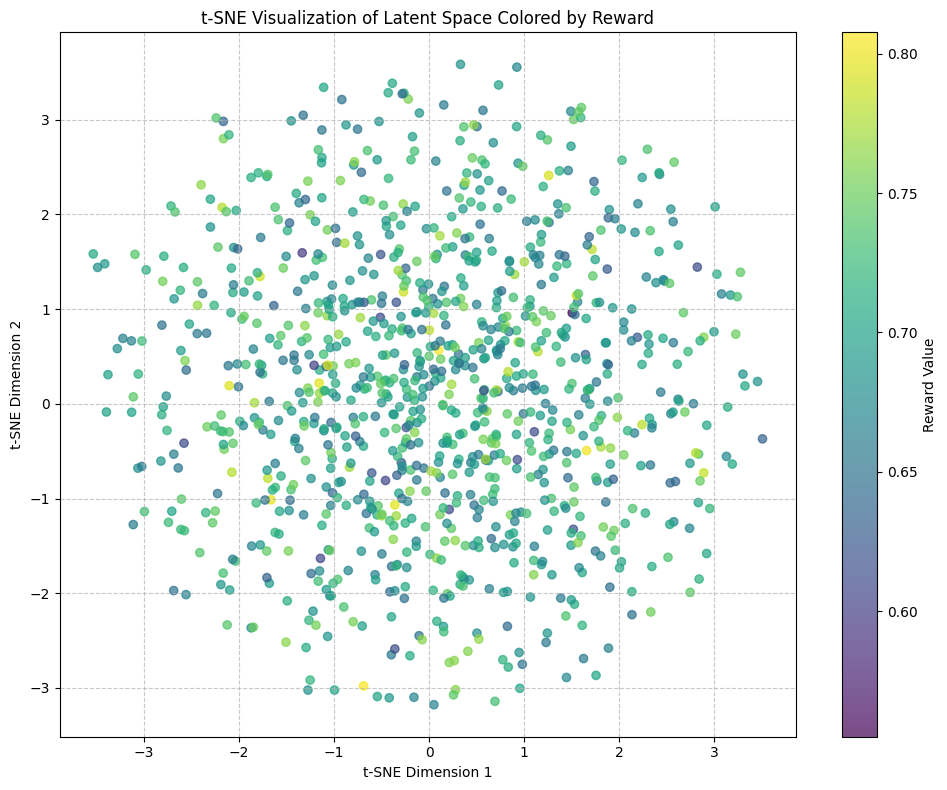

In [3]:
# Try t-SNE for better cluster visualization
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
latents_tsne = tsne.fit_transform(latents)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(latents_tsne[:, 0], latents_tsne[:, 1], c=rewards, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Reward Value')
plt.title('t-SNE Visualization of Latent Space Colored by Reward')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Alternatively, try UMAP
# !pip install umap-learn
# from umap import UMAP
# umap_reducer = UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
# latents_umap = umap_reducer.fit_transform(latents)